# 电气工程建模与仿真——Resample

前述插值是对给定数据点在一定范围内的补充，则重采样即在给定数据点中选出有规律的子集。

原频率与重采样频率为整数倍关系时比较容易，若不是整数倍关系需要采用其他方式。


In [1]:
import numpy as np
from scipy.signal import resample  # 官方文档：https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt



c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


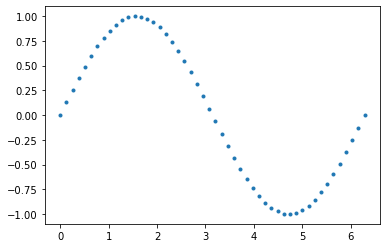

In [2]:
x = np.linspace(0, 2*np.pi, 50)  # 初始已知50个点
y = np.sin(x)
plt.plot(x, y, '.')



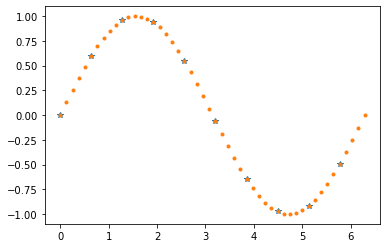

In [3]:
step = int(50 / 10)  # 如果不加类型强制转换则此处为浮点型
x_new = x[::step]  # [start:stop:step] step默认为1，传递参数时step的数据类型必须为整型/None/有__index__方法
y_new = y[::step]
plt.plot(x_new, y_new, '*')
plt.plot(x, y, '.')


~~好事的可以数一下是不是每5个选取1个~~

*如果你的数据量很大，又是整数倍降采样，建议优先考虑使用这种方法降采样。
一是由于直接从原始数据集中选取子集，比较精确；二是由于直接扔点，计算量小，节约时间。*

显然这种方法有一个问题，如果我要保留30个点，即步长非整，就不能使用这种方式重采样。
这里介绍利用前述插值方法与`scipy.signal.resample`方法重采样。

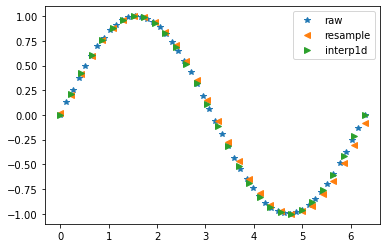

In [4]:
x_new = np.linspace(0, 2*np.pi, 30)
y_resample = resample(y, 30)
f_interp = interp1d(x, y, 'cubic')
y_interp = f_interp(x_new)

plt.plot(x, y, '*', label='raw')
plt.plot(x_new, y_resample, '<', label='resample')
plt.plot(x_new, y_interp, '>', label='interp1d')
plt.legend(loc='best')


 看一下更少点数的情况：

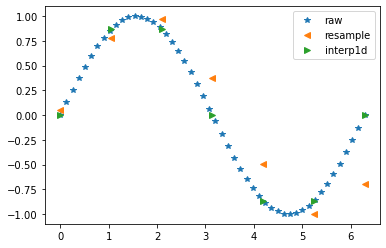

In [5]:
x_new = np.linspace(0, 2*np.pi, 7)
y_resample = resample(y, 7)
f_interp = interp1d(x, y, 'cubic')
y_interp = f_interp(x_new)

plt.plot(x, y, '*', label='raw')
plt.plot(x_new, y_resample, '<', label='resample')
plt.plot(x_new, y_interp, '>', label='interp1d')
plt.legend(loc='best')


由于`scipy.signal.resample`方法是基于fft的，因此其在大数据量下计算速度缓慢，且对于非周期信号乃至于周期信号的准确度都不高。数据量大的情况下不建议使用，仍然推荐之前提过的插值方法进行重采样。
此外，还有很多其他有趣的第三方库为重采样提供支持，如`libsamplerate`等([github地址](https://github.com/libsndfile/libsamplerate))，同样可以通过pip安装。感兴趣的同学可以自行查找。